# LABORATORIO: Aplicación de operaciones elementales

### 1. Imágenes con ruido gausiano

1. Importamos las librerías necesarias

In [3]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
import statistics #para la moda
%matplotlib inline

#Histogram:
from skimage import data, img_as_float, io
from skimage import exposure

2.Mostramos la imagen original y su correspondiente en blanco y negro

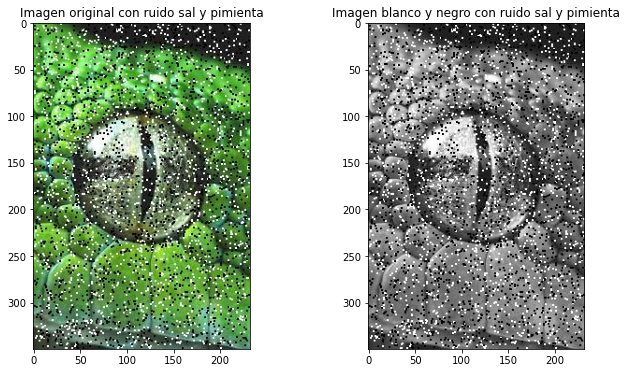

In [2]:
image = cv2.imread('imagenRuido.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('imagenRuido.jpg',cv2.IMREAD_GRAYSCALE) #cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) #convert between RGB/BGR and grayscale, color conversions

bicho = image

r = bicho[:,:,0]
g = bicho[:,:,1]
b = bicho[:,:,2]
"""
# renderizado de la imagen
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 10), sharex=True, sharey=True)
ax1.imshow(r, cmap='gray')
ax2.imshow(g, cmap='gray')
ax3.imshow(b, cmap='gray')
ax1.set_adjustable('box')
ax2.set_adjustable('box')
ax3.set_adjustable('box')
"""

fig, (ax0, ax1)=plt.subplots(ncols = 2, figsize = (11,6))
ax0.imshow(image)
ax0.set_title('Imagen original con ruido sal y pimienta')
ax1.imshow(image2,cmap='gray') #cmap='gray'
ax1.set_title('Imagen blanco y negro con ruido sal y pimienta')

plt.show()

3.Mostramos el histograma de cada capa de color RGB

In [ ]:
#Histogramas RGB (Red, Green, Blue) Un histograma por cada capa de color

def estaditicas_grafica(capa, eje = 1):
    c_min = np.min(capa,axis=eje)
    c_max = np.max(capa,axis=eje)
    c_med = np.mean(capa,axis=eje)
    c_std = np.std(capa,axis=eje)

    return c_min, c_max, c_med, c_std

def dibujar_grafica(dib, stats, title):
    dib.plot(stats[0],label='Minimo')
    dib.plot(stats[1],label='Maximo')
    dib.plot(stats[2],label='Media')
    dib.plot(stats[3],label='Desviación tipica')

    dib.set_title(title)
    dib.grid(True)
    dib.legend()
    dib.set_adjustable('box')

def grafica(dib, capa, title):
    stats = estaditicas_grafica(capa)
    dibujar_grafica(dib, stats, title)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5), sharex=True, sharey=True)
grafica(ax1, r, "Capa ROJO")
grafica(ax2, g, "Capa VERDE")
grafica(ax3, b, "Capa AZUL")

plt.show()

4.Se definen las máscaras 3x3 y 5x5 que se utilizarán para calcular la Media, Mediana y moda:


|3|x|3|
|---|---|---|
| x-1,y-1 | x-1,y | x-1,y+1 |
| x,y-1 | x,y | x,y+1 |
| x+1,y-1 | x+1,y | x+1,y+1 |



| |5|x|5||
|-----|-----|-----|-----|-----|
| x-2,y-2 | x-2,y-1 | x-2,y | x-2,y+1 | x-2,y+2 |
| x-1,y-2 | x-1,y-1 | x-1,y | x-1,y+1 | x-1,y+2 |
| x,y-2 | x,y-1 | x,y | x,y+1 | x,y+2 |
| x+1,y-2 | x+1,y-1 | x+1,y | x+1,y+1 | x+1,y+2 |
| x+2,y-2 | x+2,y-1 | x+2,y | x+2,y+1 | x+2,y+2 |

5. Se definen las funciones Mediana, Media y Moda en función de la máscara (3x3 o 5x5)

In [ ]:
"""
Las funciones reciben como parámetros: 
    img: la matriz de píxeles de la imagen a procesar
    c: la capa de color (R=0 G=1 B=2) 
    x y: coordenadas del pixel recorrido de la imagen
"""
def FiltroMedia3x3(img, c, x, y):
    #Media del canal c:
    valor=int(img[x-1,y-1,c])+int(img[x-1,y,c])+ int(img[x-1,y+1,c])+ int(img[x,y-1,c])+int(img[x,y,c])
    +int(img[x,y+1,c])+ int(img[x+1,y-1,c])+ int(img[x+1,y,c])+int(img[x+1,y+1,c])
    valor = float(valor/9)
    
    return valor


def FiltroMedia5x5(img,c, x, y):
    #Media del canal c:
    valor=int(img[x-2,y-2,c]) + int(img[x-2,y-1,c]) + int(img[x-2,y,c]) +int(img[x-2,y+1,c]) + int(img[x-2,y+2,c]) + int(img[x-1,y-2,c]) + int(img[x-1,y-1,c]) + int(img[x-1,y,c]) + int(img[x-1,y+1,c]) + int(img[x-1,y+2,c])+int(img[x,y-2,c]) + int(img[x,y-1,c])+ int(img[x,y,c]) + int(img[x,y+1,c]) + int(img[x,y+2,c])+int(img[x+1,y-2,c]) + int(img[x+1,y-1,c]) + int(img[x+1,y,c]) +int(img[x+1,y+1,c]) + int(img[x+1,y+2,c])+int(img[x+2,y-2,c]) + int(img[x+2,y-2,c]) + int(img[x+2,y,c]) + int(img[x+2,y+1,c])  + int(img[x+2,y+2,c])
    valor = float(valor/25)
    
    return valor


def FiltroMediana3x3(img,c, x, y):
    #Media del canal c:
    lista=[int(img[x-1,y-1,c]),int(img[x-1,y,c]),int(img[x-1,y+1,c]),int(img[x,y-1,c]),int(img[x,y,c]),
           int(img[x,y+1,c]), int(img[x+1,y-1,c]),int(img[x+1,y,c]),int(img[x+1,y+1,c])]
    list = sorted(lista)
    valor = list[4] #posición central
    
    return valor


def FiltroMediana5x5(img,c, x, y):
    #Media del canal c:
    lista=[int(img[x-2,y-2,c]),int(img[x-2,y-1,c]),int(img[x-2,y,c]),int(img[x-2,y+1,c]), int(img[x-2,y+2,c]),
    int(img[x-1,y-2,c]),int(img[x-1,y-1,c]),int(img[x-1,y,c]),int(img[x-1,y+1,c]),int(img[x-1,y+2,c]),
    int(img[x,y-2,c]),int(img[x,y-1,c]),int(img[x,y,c]),int(img[x,y+1,c]),int(img[x,y+2,c]),int(img[x+1,y-2,c]),
    int(img[x+1,y-1,c]),int(img[x+1,y,c]),int(img[x+1,y+1,c]),int(img[x+1,y+2,c]),int(img[x+2,y-2,c]),
    int(img[x+2,y-2,c]),int(img[x+2,y,c]),int(img[x+2,y+1,c]),int(img[x+2,y+2,c])]

    list = sorted(lista)
    valor = list[12] #posición central
    img[x,y,c] = valor
    
    return valor


def FiltroModa3x3(img,c, x, y):
    #Media del canal c:
    lista=[int(img[x-1,y-1,c]),int(img[x-1,y,c]),int(img[x-1,y+1,c]),int(img[x,y-1,c]),int(img[x,y,c]),
           int(img[x,y+1,c]), int(img[x+1,y-1,c]),int(img[x+1,y,c]),int(img[x+1,y+1,c])]
    valor = statistics.mode(lista)
    
    return valor


def FiltroModa5x5(img,c, x, y):
    #Media del canal c:
    lista=[int(img[x-2,y-2,c]),int(img[x-2,y-1,c]),int(img[x-2,y,c]),int(img[x-2,y+1,c]), int(img[x-2,y+2,c]),
    int(img[x-1,y-2,c]),int(img[x-1,y-1,c]),int(img[x-1,y,c]),int(img[x-1,y+1,c]),int(img[x-1,y+2,c]),
    int(img[x,y-2,c]),int(img[x,y-1,c]),int(img[x,y,c]),int(img[x,y+1,c]),int(img[x,y+2,c]),int(img[x+1,y-2,c]),
    int(img[x+1,y-1,c]),int(img[x+1,y,c]),int(img[x+1,y+1,c]),int(img[x+1,y+2,c]),int(img[x+2,y-2,c]),
    int(img[x+2,y-2,c]),int(img[x+2,y,c]),int(img[x+2,y+1,c]),int(img[x+2,y+2,c])]

    valor = statistics.mode(lista)
    
    return valor

5. Se muestran todas las imágenes a modo de comparativa (habría que optimizar el código porque leo 6 veces la misma img xd)

In [ ]:
img1=cv2.imread("imagenRuido.jpg")
img1=cv2.resize(img1, (232,232))
height, width, channels = img1.shape

#Mediana3x3:
for x in range(1,width-1):
    for y in range(1,height-1):
        img1[x,y,0] = FiltroMediana3x3(img1,0,x,y) #valorR
        img1[x,y,1] = FiltroMediana3x3(img1,1,x,y) #valorG
        img1[x,y,2] = FiltroMediana3x3(img1,2,x,y) #valorB
            
print("Resultado de la Mediana 3x3: ",img1[x,y,0]," ", img1[x,y,1]," ", img1[x,y,2])   
imgMediana3x3 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2=cv2.imread("imagenRuido.jpg")
img2=cv2.resize(img2, (232,232))

#Media3x3:
for x in range(1,width-1):
    for y in range(1,height-1):
        img2[x,y,0] = FiltroMedia3x3(img2,0,x,y) #valorR
        img2[x,y,1] = FiltroMedia3x3(img2,1,x,y) #valorG
        img2[x,y,2] = FiltroMedia3x3(img2,2,x,y) #valorB
            
print("Resultado de la Media 3x3: ",img2[x,y,0]," ", img2[x,y,1]," ", img2[x,y,2])   
imgMedia3x3 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3=cv2.imread("imagenRuido.jpg")
img3=cv2.resize(img3, (232,232))

#Moda3x3:
for x in range(1,width-1):
    for y in range(1,height-1):
        img3[x,y,0] = FiltroModa3x3(img3,0,x,y) #valorR
        img3[x,y,1] = FiltroModa3x3(img3,1,x,y) #valorG
        img3[x,y,2] = FiltroModa3x3(img3,2,x,y) #valorB
            
print("Resultado de la Moda 3x3: ",img3[x,y,0]," ", img3[x,y,1]," ", img3[x,y,2])   
imgModa3x3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14,6), sharex=True, sharey=True)
ax1.imshow(imgMediana3x3)
ax1.set_title("Mediana3x3")
ax2.imshow(imgMedia3x3)
ax2.set_title("Media3x3")
ax3.imshow(imgModa3x3)
ax3.set_title("Moda3x3")
plt.show()

img4=cv2.imread("imagenRuido.jpg")
img4=cv2.resize(img4, (232,232))

#Mediana5x5:
for x in range(1,width-2):
    for y in range(1,height-2):
        img4[x,y,0] = FiltroMediana5x5(img4,0,x,y) #valorR
        img4[x,y,1] = FiltroMediana5x5(img4,1,x,y) #valorG
        img4[x,y,2] = FiltroMediana5x5(img4,2,x,y) #valorB
            
print("Resultado de la Mediana 5x5: ",img4[x,y,0]," ", img4[x,y,1]," ", img4[x,y,2])   
imgMediana5x5 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

img5=cv2.imread("imagenRuido.jpg")
img5=cv2.resize(img5, (232,232))

#Media5x5:
for x in range(1,width-2):
    for y in range(1,height-2):
        img5[x,y,0] = FiltroMedia5x5(img5,0,x,y) #valorR
        img5[x,y,1] = FiltroMedia5x5(img5,1,x,y) #valorG
        img5[x,y,2] = FiltroMedia5x5(img5,2,x,y) #valorB
            
print("Resultado de la Media 5x5: ",img5[x,y,0]," ", img5[x,y,1]," ", img5[x,y,2])   
imgMedia5x5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

img6=cv2.imread("imagenRuido.jpg")
img6=cv2.resize(img6, (232,232))

#Moda5x5:
for x in range(1,width-2):
    for y in range(1,height-2):
        img6[x,y,0] = FiltroModa5x5(img6,0,x,y) #valorR
        img6[x,y,1] = FiltroModa5x5(img6,1,x,y) #valorG
        img6[x,y,2] = FiltroModa5x5(img6,2,x,y) #valorB
            
print("Resultado de la Moda 5x5: ",img6[x,y,0]," ", img6[x,y,1]," ", img6[x,y,2])   
imgModa5x5 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

fig, (ax4, ax5, ax6) = plt.subplots(ncols=3, figsize=(14,6), sharex=True, sharey=True)
ax4.imshow(imgMediana5x5)
ax4.set_title("Mediana5x5")
ax5.imshow(imgMedia5x5)
ax5.set_title("Media5x5")
ax6.imshow(imgModa5x5)
ax6.set_title("Moda5x5")
plt.show()

### 2. Cambiar color de píxeles de un determinado color

En función de un color determinado (rojo: 128-191), cambiar el color de los píxeles rojos de la imagen por la media correspondiente a sus píxeles vecinos

1.Importamos las librerías necesarias

In [ ]:
#Importamos las librerías necesarias:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image, ImageFilter
import statistics #para la moda
%matplotlib inline
#Histograma:
from skimage import data, img_as_float, io
from skimage import exposure

2. Mostramos la imagen con ruido y su histograma (en este caso tiene ruido rojo y azul tal y como se observa en el histograma)

In [ ]:
#Seleccionamos la imagen:

img = io.imread('ruidoRojo.jpg')
plt.title('Imagen con ruido')
imgplot = plt.imshow(img)
plt.show()


# Mostramos el histograma de los colores de la imagen con ruido rojo:

img = cv2.imread('ruidoRojo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.title('Histograma RGB')
    plt.xlim([0,256])

plt.show()
cv2.destroyAllWindows()

3. Se definen las máscaras 3x3 y 5x5:


|3|x|3|
|---|---|---|
| x-1,y-1 | x-1,y | x-1,y+1 |
| x,y-1 | x,y | x,y+1 |
| x+1,y-1 | x+1,y | x+1,y+1 |



| |5|x|5||
|-----|-----|-----|-----|-----|
| x-2,y-2 | x-2,y-1 | x-2,y | x-2,y+1 | x-2,y+2 |
| x-1,y-2 | x-1,y-1 | x-1,y | x-1,y+1 | x-1,y+2 |
| x,y-2 | x,y-1 | x,y | x,y+1 | x,y+2 |
| x+1,y-2 | x+1,y-1 | x+1,y | x+1,y+1 | x+1,y+2 |
| x+2,y-2 | x+2,y-1 | x+2,y | x+2,y+1 | x+2,y+2 |

4. Se definen los métodos Mediana, Media y Moda con máscaras 3x3 y 5x5 para determinar cuál porporciona la solución más óptima:

In [ ]:
"""
Las funciones reciben como parámetros: 
    img: la matriz de píxeles de la imagen a procesar
    c: la capa de color (R=0 G=1 B=2) 
    x y: coordenadas del pixel recorrido de la imagen
"""
def FiltroMedia3x3(img, c, x, y):
    #Media del canal c:
    valor=int(img[x-1,y-1,c])+int(img[x-1,y,c])+ int(img[x-1,y+1,c])+ int(img[x,y-1,c])+int(img[x,y,c])
    +int(img[x,y+1,c])+ int(img[x+1,y-1,c])+ int(img[x+1,y,c])+int(img[x+1,y+1,c])
    valor = float(valor/9)
    
    return valor


def FiltroMedia5x5(img,c, x, y):
    #Media del canal c:
    valor=int(img[x-2,y-2,c]) + int(img[x-2,y-1,c]) + int(img[x-2,y,c]) +int(img[x-2,y+1,c]) + int(img[x-2,y+2,c]) + int(img[x-1,y-2,c]) + int(img[x-1,y-1,c]) + int(img[x-1,y,c]) + int(img[x-1,y+1,c]) + int(img[x-1,y+2,c])+int(img[x,y-2,c]) + int(img[x,y-1,c])+ int(img[x,y,c]) + int(img[x,y+1,c]) + int(img[x,y+2,c])+int(img[x+1,y-2,c]) + int(img[x+1,y-1,c]) + int(img[x+1,y,c]) +int(img[x+1,y+1,c]) + int(img[x+1,y+2,c])+int(img[x+2,y-2,c]) + int(img[x+2,y-2,c]) + int(img[x+2,y,c]) + int(img[x+2,y+1,c])  + int(img[x+2,y+2,c])
    valor = float(valor/25)
    
    return valor


def FiltroMediana3x3(img,c, x, y):
    #Media del canal c:
    lista=[int(img[x-1,y-1,c]),int(img[x-1,y,c]),int(img[x-1,y+1,c]),int(img[x,y-1,c]),int(img[x,y,c]),
           int(img[x,y+1,c]), int(img[x+1,y-1,c]),int(img[x+1,y,c]),int(img[x+1,y+1,c])]
    list = sorted(lista)
    valor = list[4] #posición central
    
    return valor


def FiltroMediana5x5(img,c, x, y):
    #Media del canal c:
    lista=[int(img[x-2,y-2,c]),int(img[x-2,y-1,c]),int(img[x-2,y,c]),int(img[x-2,y+1,c]), int(img[x-2,y+2,c]),
    int(img[x-1,y-2,c]),int(img[x-1,y-1,c]),int(img[x-1,y,c]),int(img[x-1,y+1,c]),int(img[x-1,y+2,c]),
    int(img[x,y-2,c]),int(img[x,y-1,c]),int(img[x,y,c]),int(img[x,y+1,c]),int(img[x,y+2,c]),int(img[x+1,y-2,c]),
    int(img[x+1,y-1,c]),int(img[x+1,y,c]),int(img[x+1,y+1,c]),int(img[x+1,y+2,c]),int(img[x+2,y-2,c]),
    int(img[x+2,y-2,c]),int(img[x+2,y,c]),int(img[x+2,y+1,c]),int(img[x+2,y+2,c])]

    list = sorted(lista)
    valor = list[12] #posición central
    img[x,y,c] = valor
    
    return valor


def FiltroModa3x3(img,c, x, y):
    #Media del canal c:
    lista=[int(img[x-1,y-1,c]),int(img[x-1,y,c]),int(img[x-1,y+1,c]),int(img[x,y-1,c]),int(img[x,y,c]),
           int(img[x,y+1,c]), int(img[x+1,y-1,c]),int(img[x+1,y,c]),int(img[x+1,y+1,c])]
    valor = statistics.mode(lista)
    
    return valor


def FiltroModa5x5(img,c, x, y):
    #Media del canal c:
    lista=[int(img[x-2,y-2,c]),int(img[x-2,y-1,c]),int(img[x-2,y,c]),int(img[x-2,y+1,c]), int(img[x-2,y+2,c]),
    int(img[x-1,y-2,c]),int(img[x-1,y-1,c]),int(img[x-1,y,c]),int(img[x-1,y+1,c]),int(img[x-1,y+2,c]),
    int(img[x,y-2,c]),int(img[x,y-1,c]),int(img[x,y,c]),int(img[x,y+1,c]),int(img[x,y+2,c]),int(img[x+1,y-2,c]),
    int(img[x+1,y-1,c]),int(img[x+1,y,c]),int(img[x+1,y+1,c]),int(img[x+1,y+2,c]),int(img[x+2,y-2,c]),
    int(img[x+2,y-2,c]),int(img[x+2,y,c]),int(img[x+2,y+1,c]),int(img[x+2,y+2,c])]

    valor = statistics.mode(lista)
    
    return valor

5. Ejemplo del cálculo de la mediana de la imagen. 

In [ ]:
#Se lee la imagen y se redimensiona para que se pueda recorrer
img=cv2.imread("ruidoRojo.jpg")
img=cv2.resize(img, (868,868))
height, width, channels = img.shape

print("Alto: ",height," Ancho: ",width," Nº de canales: ",channels)

#La imagen tiene 3 canales de color (RGB), por lo que la matriz será de dimensión 3
for x in range(1,width-1):
    for y in range(1,height-1):
        if img[x,y,0] > 100: #El valor 0 se corresponde con el canal R, he puesto >100 pero se puede poner otro de 0-255
            img[x,y,0] = FiltroMediana3x3(img,0,x,y) #valorR
            img[x,y,1] = FiltroMediana3x3(img,1,x,y) #valorG
            img[x,y,2] = FiltroMediana3x3(img,2,x,y) #valorB

print("Resultado de la Mediana: ",img[x,y,0]," ", img[x,y,1]," ", img[x,y,2])   

#Aquí veréis que la imagen que se abre en una pestaña sale con colores diferentes.
#No sé cuál es la buena, si la que se abre(*) o la que se muestra a continuación(**) tras el filtro
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
imgplot = plt.imshow(img) # (**)
plt.show()


cv2.imshow('img',img) # (*)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Mostramos todas las imágenes a modo de comparativa:
img1=cv2.imread("ruidoRojo.jpg")
img1=cv2.resize(img1, (868,868))
height, width, channels = img.shape

#Mediana3x3:
for x in range(1,width-1):
    for y in range(1,height-1):
        if img1[x,y,0] > 100: 
            img1[x,y,0] = FiltroMediana3x3(img1,0,x,y) #valorR
            img1[x,y,1] = FiltroMediana3x3(img1,1,x,y) #valorG
            img1[x,y,2] = FiltroMediana3x3(img1,2,x,y) #valorB
            
print("Resultado de la Mediana 3x3: ",img1[x,y,0]," ", img1[x,y,1]," ", img1[x,y,2])   
imgMediana3x3 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2=cv2.imread("ruidoRojo.jpg")
img2=cv2.resize(img2, (868,868))
#Media3x3:
for x in range(1,width-1):
    for y in range(1,height-1):
        if img2[x,y,0] > 100: 
            img2[x,y,0] = FiltroMedia3x3(img2,0,x,y) #valorR
            img2[x,y,1] = FiltroMedia3x3(img2,1,x,y) #valorG
            img2[x,y,2] = FiltroMedia3x3(img2,2,x,y) #valorB
            
print("Resultado de la Media 3x3: ",img2[x,y,0]," ", img2[x,y,1]," ", img2[x,y,2])   
imgMedia3x3 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3=cv2.imread("ruidoRojo.jpg")
img3=cv2.resize(img3, (868,868))
#Moda3x3:
for x in range(1,width-1):
    for y in range(1,height-1):
        if img3[x,y,0] > 100: 
            img3[x,y,0] = FiltroModa3x3(img3,0,x,y) #valorR
            img3[x,y,1] = FiltroModa3x3(img3,1,x,y) #valorG
            img3[x,y,2] = FiltroModa3x3(img3,2,x,y) #valorB
            
print("Resultado de la Moda 3x3: ",img3[x,y,0]," ", img3[x,y,1]," ", img3[x,y,2])   
imgModa3x3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 10), sharex=True, sharey=True)
ax1.imshow(imgMediana3x3)
ax1.set_title("Mediana3x3")
ax2.imshow(imgMedia3x3)
ax2.set_title("Media3x3")
ax3.imshow(imgModa3x3)
ax3.set_title("Moda3x3")
plt.show()

img4=cv2.imread("ruidoRojo.jpg")
img4=cv2.resize(img4, (868,868))
height, width, channels = img.shape

#Mediana5x5:
for x in range(1,width-2):
    for y in range(1,height-2):
        if img4[x,y,0] > 100: 
            img4[x,y,0] = FiltroMediana5x5(img4,0,x,y) #valorR
            img4[x,y,1] = FiltroMediana5x5(img4,1,x,y) #valorG
            img4[x,y,2] = FiltroMediana5x5(img4,2,x,y) #valorB
            
print("Resultado de la Mediana 5x5: ",img4[x,y,0]," ", img4[x,y,1]," ", img4[x,y,2])   
imgMediana5x5 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

img5=cv2.imread("ruidoRojo.jpg")
img5=cv2.resize(img5, (868,868))
#Media5x5:
for x in range(1,width-2):
    for y in range(1,height-2):
        if img5[x,y,0] > 100: 
            img5[x,y,0] = FiltroMedia5x5(img5,0,x,y) #valorR
            img5[x,y,1] = FiltroMedia5x5(img5,1,x,y) #valorG
            img5[x,y,2] = FiltroMedia5x5(img5,2,x,y) #valorB
            
print("Resultado de la Media 5x5: ",img5[x,y,0]," ", img5[x,y,1]," ", img5[x,y,2])   
imgMedia5x5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

img6=cv2.imread("ruidoRojo.jpg")
img6=cv2.resize(img6, (868,868))
#Moda5x5:
for x in range(1,width-2):
    for y in range(1,height-2):
        if img6[x,y,0] > 100: 
            img6[x,y,0] = FiltroModa5x5(img6,0,x,y) #valorR
            img6[x,y,1] = FiltroModa5x5(img6,1,x,y) #valorG
            img6[x,y,2] = FiltroModa5x5(img6,2,x,y) #valorB
            
print("Resultado de la Moda 5x5: ",img6[x,y,0]," ", img6[x,y,1]," ", img6[x,y,2])   
imgModa5x5 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

fig, (ax4, ax5, ax6) = plt.subplots(ncols=3, figsize=(16, 10), sharex=True, sharey=True)
ax4.imshow(imgMediana5x5)
ax4.set_title("Mediana5x5")
ax5.imshow(imgMedia5x5)
ax5.set_title("Media5x5")
ax6.imshow(imgModa5x5)
ax6.set_title("Moda5x5")
plt.show()